# Walmart Data Analysis

### Import Libraries and Get the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_excel("C:/Users/Admin/Downloads/Walmart Sales.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [5]:
df.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


In [6]:
df.nunique()

Invoice ID       1000
Branch              3
City                3
Customer type       2
Gender              2
Product line        6
Unit price        943
Quantity           10
Date               89
Time              506
Payment             3
Rating             61
dtype: int64

### Data Preprocessing

**Combine Date and Time to Obtain Final Datetime Value**

In [7]:
df["Time_str"] = df["Time"].astype("str")

df["Final date"] = pd.to_datetime(df['Date'] + ' ' + df['Time_str'])

df.drop("Time_str", axis=1, inplace=True)

**Calculate Sales for Transactions**

In [8]:
df["Sales"] = df["Unit price"]*df["Quantity"]

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Final date,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,2019-01-05 13:08:00,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,2019-03-08 10:29:00,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,2019-03-03 13:23:00,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,2019-01-27 20:33:00,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,2019-02-08 10:37:00,604.17


### EDA

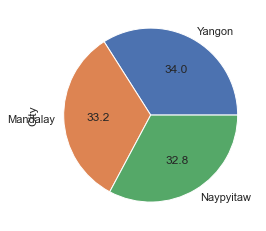

In [10]:
df.City.value_counts().plot(kind='pie',autopct='%.1f')

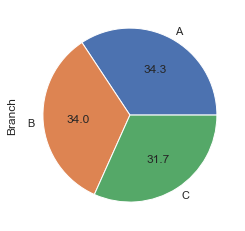

In [11]:
df.Branch.value_counts().plot(kind='pie',autopct='%.1f')

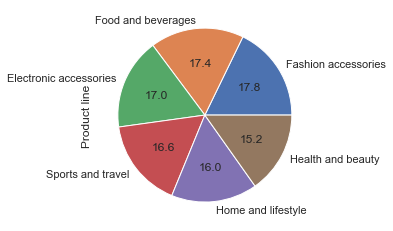

In [12]:
df["Product line"].value_counts().plot(kind='pie',autopct='%.1f')

--------------------------

### A. Analyze the performance of sales and revenue at the city and branch level

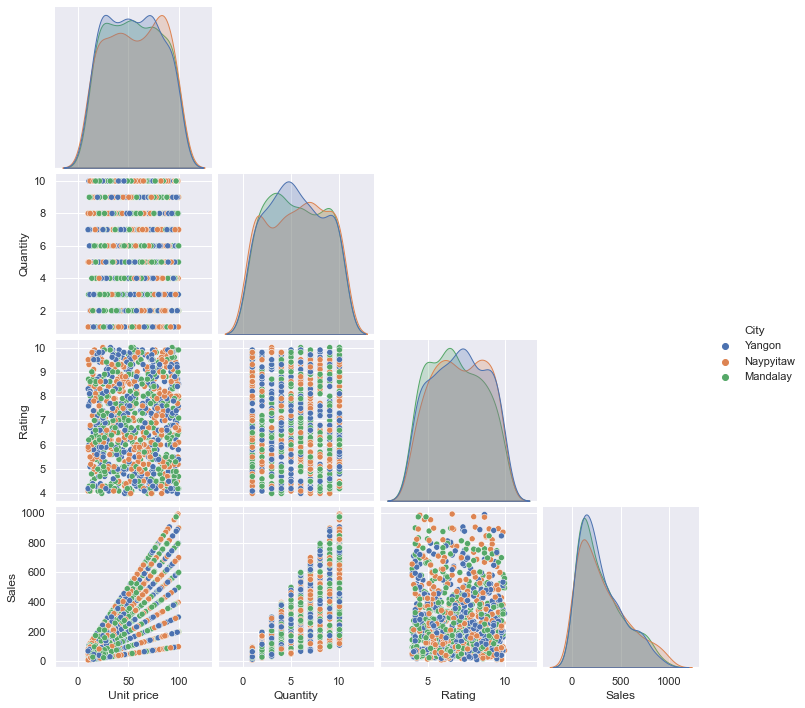

In [13]:
sns.pairplot(df, corner=True, hue='City')

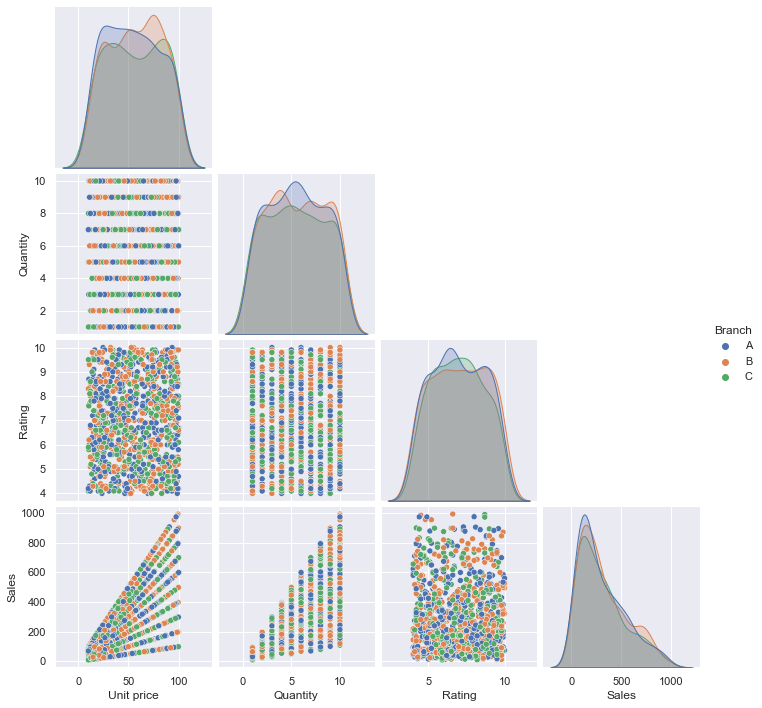

In [14]:
sns.pairplot(df, corner=True, hue='Branch')

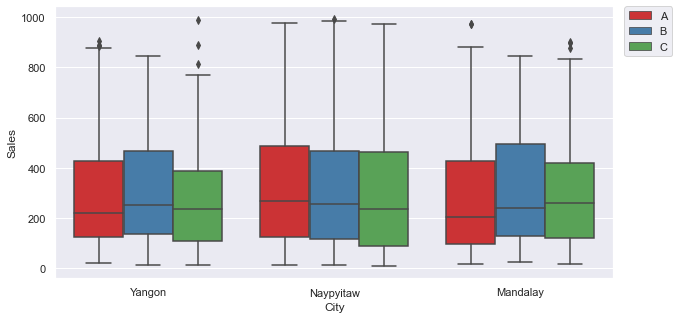

In [15]:
fig,axs=plt.subplots(figsize=(10,5))
sns.boxplot(data=df, y="Sales", x='City', hue='Branch', palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

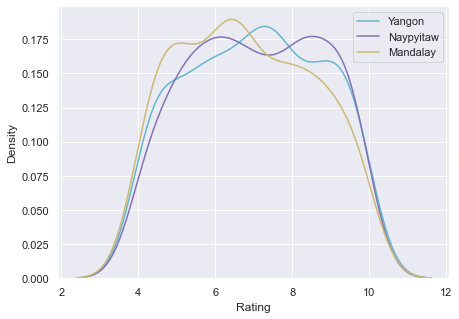

In [16]:
fig,axs=plt.subplots(figsize=(7,5))
sns.kdeplot(df[df["City"]=="Yangon"]["Rating"], color="c")
sns.kdeplot(df[df["City"]=="Naypyitaw"]["Rating"], color="m")
sns.kdeplot(df[df["City"]=="Mandalay"]["Rating"], color="y")
plt.legend(["Yangon", "Naypyitaw","Mandalay"])

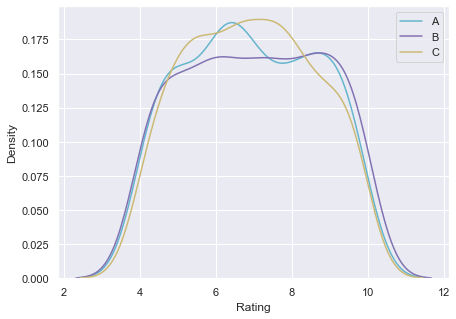

In [17]:
fig,axs=plt.subplots(figsize=(7,5))
sns.kdeplot(df[df["Branch"]=="A"]["Rating"], color="c")
sns.kdeplot(df[df["Branch"]=="B"]["Rating"], color="m")
sns.kdeplot(df[df["Branch"]=="C"]["Rating"], color="y")
plt.legend(["A", "B","C"])

Text(0.5, 1.0, 'Sales in thousands')

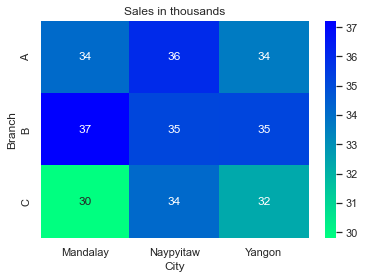

In [18]:
sns.heatmap(df.pivot_table(values='Sales',index='Branch',columns='City', aggfunc=sum).div(1000)
            ,annot=True, cmap='winter_r')
plt.title("Sales in thousands")

---------------------------------------------------------------
### B. What is the average price of an item sold at each branch of the city

In [19]:
df.pivot_table(values='Sales',index='Branch',columns='City', aggfunc="mean")

City,Mandalay,Naypyitaw,Yangon
Branch,,,
A,286.807479,327.142182,295.151491
B,315.389237,322.548165,311.446991
C,313.627579,313.395780,285.862212


-------------------------------
### C. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Monthly Sales')

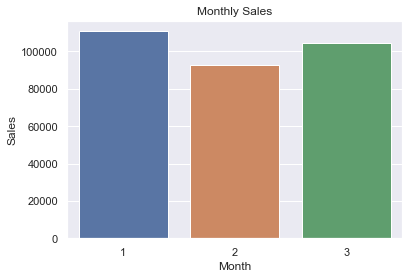

In [20]:
sns.barplot(df.groupby(df["Final date"].dt.month).sum().index ,df.groupby(df["Final date"].dt.month).sum()["Sales"])
plt.xlabel("Month")
plt.title("Monthly Sales")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Consolidated Sales for Dates in a Month')

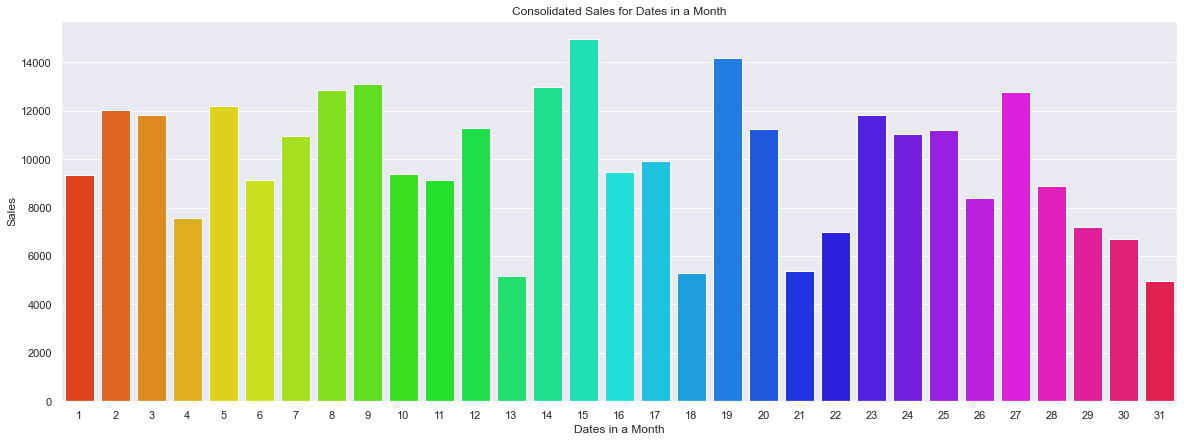

In [21]:
fig,axs=plt.subplots(figsize=(20,7))
sns.barplot(df.groupby(df["Final date"].dt.day).sum().index ,df.groupby(df["Final date"].dt.day).sum()["Sales"], palette='hsv')
plt.xlabel("Dates in a Month")
plt.title("Consolidated Sales for Dates in a Month")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sales for Days of Week')

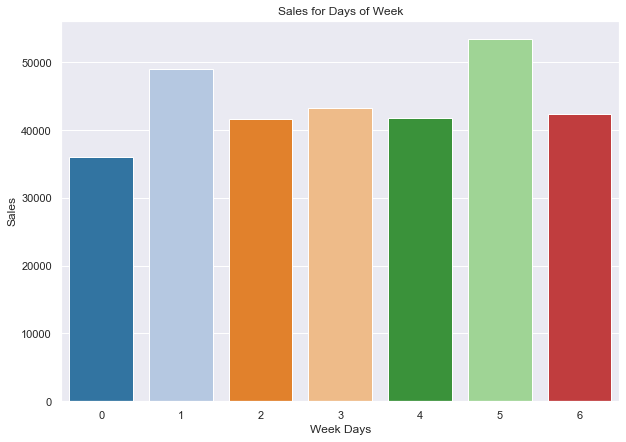

In [22]:
fig,axs=plt.subplots(figsize=(10,7))
sns.barplot(df.groupby(df["Final date"].dt.weekday).sum().index ,df.groupby(df["Final date"].dt.weekday).sum()["Sales"], 
            palette="tab20")
plt.xlabel("Week Days")
plt.title("Sales for Days of Week")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sales across Product Line')

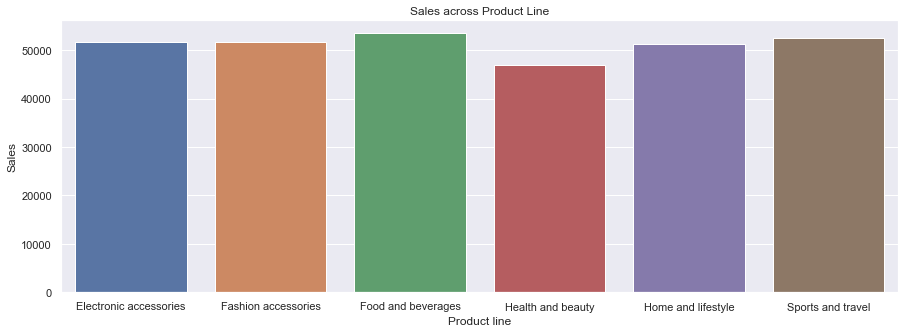

In [23]:
fig,axs=plt.subplots(figsize=(15,5))
sns.barplot(df.groupby(df["Product line"]).sum().index ,df.groupby(df["Product line"]).sum()["Sales"])
plt.title("Sales across Product Line")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ratings across Product Line')

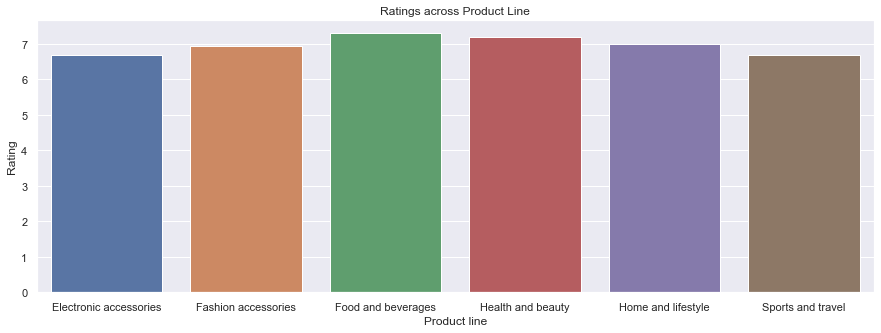

In [24]:
fig,axs=plt.subplots(figsize=(15,5))
sns.barplot(df.groupby(df["Product line"]).sum().index ,df.groupby(df["Product line"]).median()["Rating"])
plt.title("Ratings across Product Line")

Text(0.5, 1.0, 'Sales in thousands')

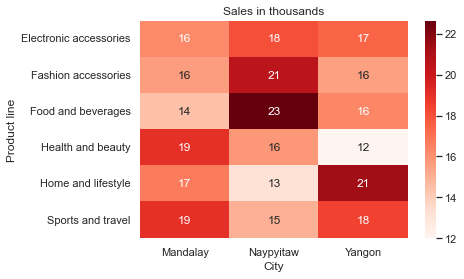

In [25]:
sns.heatmap(df.pivot_table(values='Sales',index='Product line',columns='City', aggfunc=sum).div(1000) ,annot=True, cmap='Reds')
plt.title("Sales in thousands")

Text(0.5, 1.0, 'Sales in thousands')

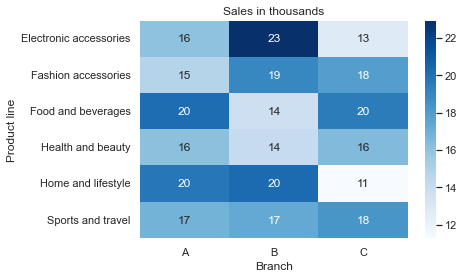

In [26]:
sns.heatmap(df.pivot_table(values='Sales',index='Product line',columns='Branch', aggfunc=sum).div(1000) 
            ,annot=True,cmap="Blues")
plt.title("Sales in thousands")

Text(0.5, 1.0, 'Monthly Sales by Gender and Membership')

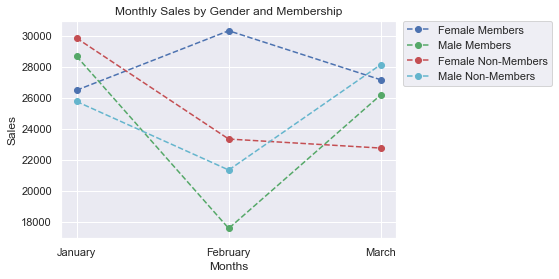

In [27]:
plt.plot(["January","February","March"],
         df[(df["Gender"]=="Female") & (df["Customer type"]=="Member")].groupby(df["Final date"].dt.month).sum()["Sales"],
        'bo--',label='Female Members')
plt.plot(["January","February","March"],
         df[(df["Gender"]=="Male") & (df["Customer type"]=="Member")].groupby(df["Final date"].dt.month).sum()["Sales"],
        'go--',label='Male Members')
plt.plot(["January","February","March"],
         df[(df["Gender"]=="Female") & (df["Customer type"]=="Normal")].groupby(df["Final date"].dt.month).sum()["Sales"],
        'ro--', label='Female Non-Members')
plt.plot(["January","February","March"],
         df[(df["Gender"]=="Male") & (df["Customer type"]=="Normal")].groupby(df["Final date"].dt.month).sum()["Sales"],
        'co--', label='Male Non-Members')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Monthly Sales by Gender and Membership")

Text(0.5, 1.0, 'Sales across Product Line ')

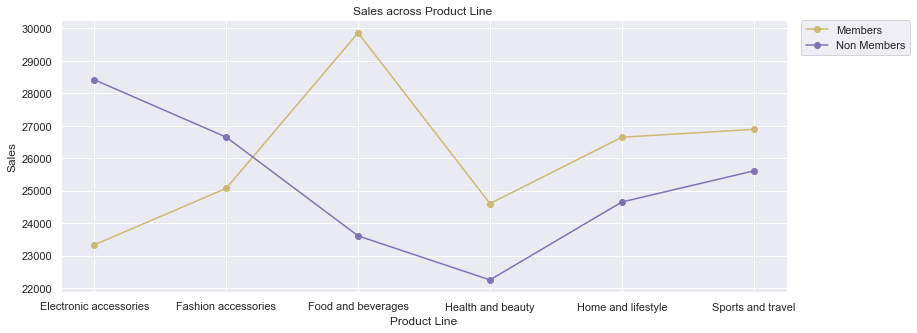

In [28]:
fig,axs=plt.subplots(figsize=(13,5))
plt.plot(["Electronic accessories","Fashion accessories","Food and beverages","Health and beauty",
          "Home and lifestyle","Sports and travel"],
         df[df["Customer type"]=="Member"].groupby(df["Product line"]).sum()["Sales"], 'yo-',label='Members')
plt.plot(["Electronic accessories","Fashion accessories","Food and beverages","Health and beauty",
          "Home and lifestyle","Sports and travel"],
         df[df["Customer type"]=="Normal"].groupby(df["Product line"]).sum()["Sales"], 'mo-',label='Non Members')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Sales")
plt.xlabel("Product Line")
plt.title("Sales across Product Line ")

Text(0.5, 1.0, 'Sales across Product Line')

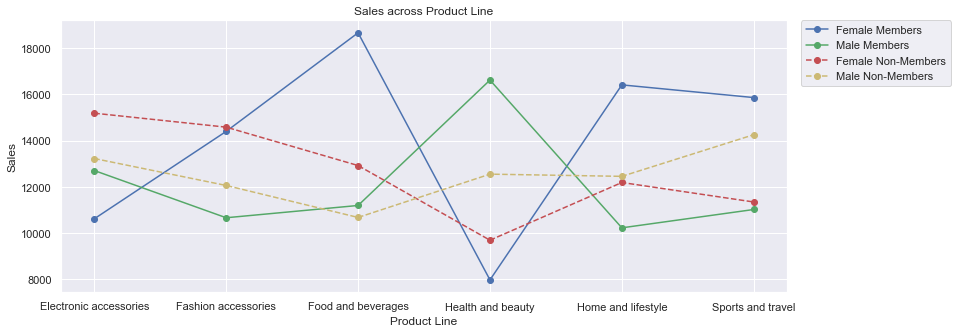

In [29]:
fig,axs=plt.subplots(figsize=(13,5))
plt.plot(["Electronic accessories","Fashion accessories","Food and beverages","Health and beauty",
          "Home and lifestyle","Sports and travel"],
         df[(df["Gender"]=="Female") & (df["Customer type"]=="Member")].groupby(df["Product line"]).sum()["Sales"],
        'bo-',label='Female Members')
plt.plot(["Electronic accessories","Fashion accessories","Food and beverages","Health and beauty",
          "Home and lifestyle","Sports and travel"],
         df[(df["Gender"]=="Male") & (df["Customer type"]=="Member")].groupby(df["Product line"]).sum()["Sales"],
        'go-',label='Male Members')
plt.plot(["Electronic accessories","Fashion accessories","Food and beverages","Health and beauty",
          "Home and lifestyle","Sports and travel"],
         df[(df["Gender"]=="Female") & (df["Customer type"]=="Normal")].groupby(df["Product line"]).sum()["Sales"],
        'ro--', label='Female Non-Members')
plt.plot(["Electronic accessories","Fashion accessories","Food and beverages","Health and beauty",
          "Home and lifestyle","Sports and travel"],
         df[(df["Gender"]=="Male") & (df["Customer type"]=="Normal")].groupby(df["Product line"]).sum()["Sales"],
        'yo--', label='Male Non-Members')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Product Line")
plt.ylabel("Sales")
plt.title("Sales across Product Line")

### Observations
<ul>
<li> Sales is Maximum at Branch B of City Mandalay and Minimum at Branch C of same City.
<li> Across cities and branch provided Sales are maximum on Saturdays and Minimum on Mondays.
<li> City Naypyataw has maximum Sales of Food and Beverages whereas Yangon city has maximum sales of Home and Lifestyle.
<li> Members contribute towards the sales of all Product line except for Electronic Accessories and Fashion Accessories 
for which comparatively non members contribute more.
</ul>